In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O2','C2']
psi_dihedral=['C1','O2','C2','C3']

di_sugar=['MAN', 'MAN']
patterns1= ['MAN(*_*_)]-MAN(*_*_)', 'MAN(*_*_)-MAN(*_*_)','MAN(*_*_)]-[*]-MAN(*_*_)', 'MAN(*_*_)-[*]-MAN(*_*_)']
patterns2= ['DManpa1-2DManpa', 'DManpa1-2]DManpa', 'DManpa1-2[*]DManpa']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-2D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A14', '1AA5', '1AA5', '1AF6', '1AF6', '1AF6', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AGM', '1AGM', '1BHG', '1BHG', '1BJI', '1BRR', '1BRR', '1BXH', '1BXH', '1BZB', '1C0Q', '1C0Q', '1C0R', '1C0R', '1C3N', '1CAP', '1CB8', '1CF3', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1DBG', '1DBO', '1DOG', '1DOG', '1DP5', '1DPJ', '1DSR', '1DZE', '1E05', '1EX2', '1F4Y', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1FE0', '1FE4', '1FEE', '1FI1', '1FQ6', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1G0V', '1GAC', '1GAC', '1GAH', '1GAH', '1GAI', '1GAI', '1GAL', '1GLM', '1GLM', '1GNX', '1GPE', '1GPE', '1GSL', '1GW0', '1GW0', '1GYA', '1GZ9', '1H3X', '1H3Y', '1H4P', '1H4P', '1HFU', '1HH3', '1HH3', '1HH3', '1HH3', '1HHA', '1HHA', '1HHA', '1HHA', '1HHC', '1HHC', '1HHC', '1HHC', '1HHF', '1HHF', '1HHF', '1HHF', '1HM2', '1HM2', '1HM3', '1HM3', '1HMU', '1HMU

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 46 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 46 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 4502 
valid torsion1 and torsion2: (4502, 4502)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['5.E', '4.E'], ['1S3', '-'])
(['5.B', '4.B'], ['4C1', '4C1'])
(['7.s', '6.s'], ['4C1', '4C1'])
(['5.s', '4.s'], ['4C1', '4C1'])
(['8.s', '6.s'], ['4C1', '4C1'])
(['7.3', '6.3'], ['4C1', '4C1'])
(['5.3', '4.3'], ['4C1', '4C1'])
(['8.3', '6.3'], ['4C1', '4C1'])
(['7.c', '6.c'], ['4C1', '4C1'])
(['5.c', '4.c'], ['4C1', '4C1'])
(['8.c', '6.c'], ['4C1', '4C1'])
(['7.k', '6.k'], ['4C1', '4C1'])
(['5.k', '4.k'], ['4C1', '4C1'])
(['8.k', '6.k'], ['4C1', '4C1'])
(['5.C', '4.C'], ['4C1', '4C1'])
(['8.C', '7.C'], ['4C1', '4C1'])
(['6.C', '5.C'], ['4C1', '4C1'])
(['7.C', '4.C'], ['4C1', '4C1'])
(['5.C', '4.C'], ['4C1', '4C1'])
(['7.P', '6.P'], ['4C1', '4C1'])
(['5.P', '4.P'], ['4C1', '4C1'])
(['8.P', '6.P'], ['4C1', '4C1'])
(['5.W', '4.W'], ['4C1', '4C1'])
(['5.O', '4.O'], ['4C1', '4C1'])
(['7.X', '6.X'], ['4C1', '4C1'])
(['5.X', '4.X'], ['4C1', '4C1'])
(['8.X', '6.X'], ['4C1', '4C1'])
(['7.f', '6.f'], ['4C1', '4C1'])
(['5.f', '4.f'], ['4C1', '4C1'])
(['8.f', '6.f'], ['4C1', '4C1'])
(['5.e', '4.

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//7lyu.pdb E MAN 5 C1
../../pdbs//7lyu.pdb E MAN 4 O2
5632 5627
Connection found between 5632 and 5627
../../pdbs//6z7a.pdb B MAN 5 C1
../../pdbs//6z7a.pdb B MAN 4 O2
5509 5494
Connection found between 5509 and 5494
../../pdbs//8g3r.pdb s MAN 7 C1
../../pdbs//8g3r.pdb s MAN 6 O2
14449 14444
No connection found between 14449 and 14444
2
../../pdbs//8g3r.pdb s MAN 5 C1
../../pdbs//8g3r.pdb s MAN 4 O2
14427 14422
Connection found between(2) 14427 and 14422
../../pdbs//8g3r.pdb s MAN 8 C1
../../pdbs//8g3r.pdb s MAN 6 O2
14460 14444
No connection found between 14460 and 14444
4
../../pdbs//8g3r.pdb 3 MAN 7 C1
../../pdbs//8g3r.pdb 3 MAN 6 O2
14683 14678
No connection found between 14683 and 14678
5
../../pdbs//8g3r.pdb 3 MAN 5 C1
../../pdbs//8g3r.pdb 3 MAN 4 O2
14661 14656
Connection found between(2) 14661 and 14656
../../pdbs//8g3r.pdb 3 MAN 8 C1
../../pdbs//8g3r.pdb 3 MAN 6 O2
14694 14678
No connection found between 14694 and 14678
7
../../pdbs//8g3r.pdb c MAN 7 C1
../../pdbs//8g

In [13]:
output_df.to_csv('DManpa1-2DManpa_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DManpa1-2DManpa_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,7lyu.pdb,E MAN 5 C2 C1 MAN 4 O2 C2,E MAN 5 C1 MAN 4 O2 C2 C3,301.7985,302.0176,"([MAN(5_E_), MAN(4_E_)], [111.92, 94.51])",MAN(5_E_)-MAN(4_E_)-BMA(3_E_)-NAG(2_E_)-NAG(1_...,DManpa1-2DManpa1-3DManpb1-4DGlcpNAcb1-4DGlcpNA...,"([5.E, 4.E], [1S3, -])"
1,6z7a.pdb,B MAN 5 C2 C1 MAN 4 O2 C2,B MAN 5 C1 MAN 4 O2 C2 C3,191.7010,103.8020,"([MAN(5_B_), MAN(4_B_)], [36.18, 42.13])",MAN(6_B_)-[MAN(5_B_)-MAN(4_B_)]-BMA(3_B_)-NAG(...,DManpa1-2DManpa1-3[DManpa1-6]DManpb1-4DGlcpNAc...,"([5.B, 4.B], [4C1, 4C1])"
2,8g3r.pdb,s MAN 7 C2 C1 MAN 6 O2 C2,s MAN 7 C1 MAN 6 O2 C2 C3,192.3960,42.2713,"([MAN(7_s_), MAN(6_s_)], [112.96, 84.69])",MAN(8_s_)-[MAN(7_s_)]-MAN(6_s_)-[MAN(5_s_)-MAN...,DManpa1-2DManpa1-3[DManpa1-3[DManpa1-6]DManpa1...,"([7.s, 6.s], [4C1, 4C1])"
3,8g3r.pdb,s MAN 5 C2 C1 MAN 4 O2 C2,s MAN 5 C1 MAN 4 O2 C2 C3,199.8720,123.2020,"([MAN(5_s_), MAN(4_s_)], [100.66, 67.51])",MAN(8_s_)-[MAN(7_s_)]-MAN(6_s_)-[MAN(5_s_)-MAN...,DManpa1-2DManpa1-3[DManpa1-3[DManpa1-6]DManpa1...,"([5.s, 4.s], [4C1, 4C1])"
4,8g3r.pdb,s MAN 8 C2 C1 MAN 6 O2 C2,s MAN 8 C1 MAN 6 O2 C2 C3,174.0200,299.2937,"([MAN(8_s_), MAN(6_s_)], [132.52, 84.69])",MAN(8_s_)-[MAN(7_s_)]-MAN(6_s_)-[MAN(5_s_)-MAN...,DManpa1-2DManpa1-3[DManpa1-3[DManpa1-6]DManpa1...,"([8.s, 6.s], [4C1, 4C1])"
...,...,...,...,...,...,...,...,...,...
4497,3rg1.pdb,T MAN 5 C2 C1 MAN 4 O2 C2,T MAN 5 C1 MAN 4 O2 C2 C3,174.4080,297.7757,"([MAN(5_T_), MAN(4_T_)], [48.05, 47.6])",MAN(6_T_)-MAN(5_T_)-[MAN(7_T_)]-MAN(4_T_)-[MAN...,DManpa1-2DManpa1-6[DManpa1-3]DManpa1-6[DManpa1...,"([5.T, 4.T], [4C1, 4C1])"
4498,3rg1.pdb,R MAN 7 C2 C1 MAN 4 O2 C2,R MAN 7 C1 MAN 4 O2 C2 C3,167.3880,29.5073,"([MAN(7_R_), MAN(4_R_)], [49.3, 47.58])",MAN(6_R_)-MAN(5_R_)-[MAN(7_R_)]-MAN(4_R_)-[MAN...,DManpa1-2DManpa1-6[DManpa1-3]DManpa1-6[DManpa1...,"([7.R, 4.R], [4C1, 4C1])"
4499,3rg1.pdb,R MAN 6 C2 C1 MAN 5 O2 C2,R MAN 6 C1 MAN 5 O2 C2 C3,324.3131,183.0650,"([MAN(6_R_), MAN(5_R_)], [49.7, 47.83])",MAN(6_R_)-MAN(5_R_)-[MAN(7_R_)]-MAN(4_R_)-[MAN...,DManpa1-2DManpa1-6[DManpa1-3]DManpa1-6[DManpa1...,"([6.R, 5.R], [-, 4C1])"
4500,3rg1.pdb,R MAN 5 C2 C1 MAN 4 O2 C2,R MAN 5 C1 MAN 4 O2 C2 C3,174.9970,298.2801,"([MAN(5_R_), MAN(4_R_)], [47.83, 47.58])",MAN(6_R_)-MAN(5_R_)-[MAN(7_R_)]-MAN(4_R_)-[MAN...,DManpa1-2DManpa1-6[DManpa1-3]DManpa1-6[DManpa1...,"([5.R, 4.R], [4C1, 4C1])"


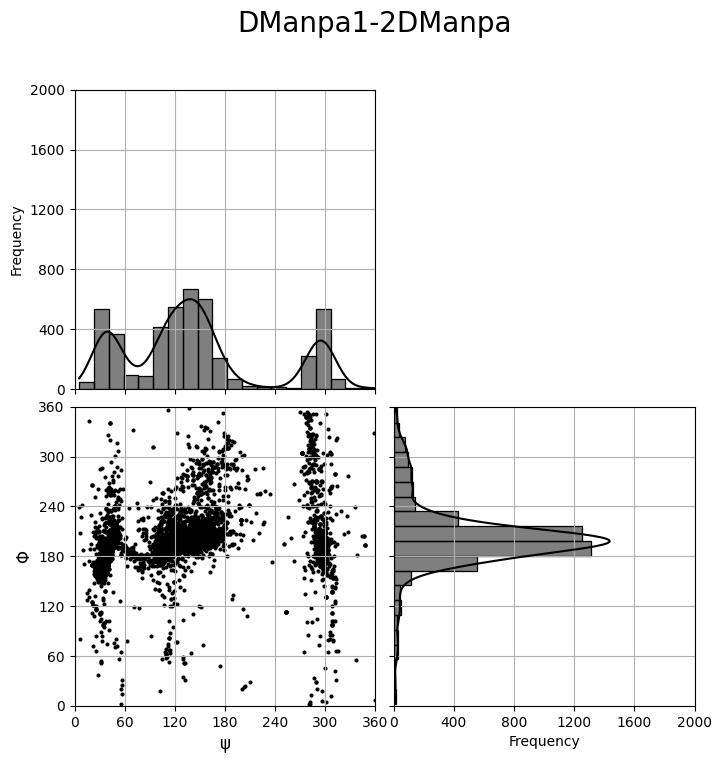

In [18]:
instant1.plot(torsions=instant1.torsions, title='DManpa1-2DManpa',max_histogram_scale=2000,step_histogram_tick=400)